In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as ss

# Building statistical model for gaze duration from 20 questions dataset

In [11]:
dataset_location = "/Users/evanpan/Documents/Datasets/Audio_turn_taking_dataset/"
dataset_location = "F:/MASC/JALI_neck/data/Audio_turn_taking_dataset/"
gaze_file_20q_name_template = "gaze/{}_20q_game_direct.xls"
gaze_file_heads_up_name_template = "gaze/{}_headsup_game_direct.xls"
talking_file_20q_name_template = "talking/{}_20q_game_talking.xls"
talking_file_heads_up_name_template = "talking/{}_headsup_game_talking.xls"

gaze_dfs = []
talking_dfs = []
# read the the 20q dataset
for i in range(1, 41):
    if i < 10:
        str_i = "0" + str(i)
    else:
        str_i = str(i)
    gaze_path_i = dataset_location + gaze_file_20q_name_template.format(str_i)
    talking_path_i = dataset_location + talking_file_20q_name_template.format(str_i)
    
    gaze_df = pd.read_excel(gaze_path_i)
    gaze_dfs.append(gaze_df)
    talking_df = pd.read_excel(talking_path_i)
    talking_dfs.append(talking_df)
# process them into a time series
gaze_series = []
talking_series = []
duration_of_gaze = []
for i in range(0, 20):
    df1 = gaze_dfs[2*i] 
    df2 = gaze_dfs[2*i+1]
    diff = df1["stop"][df1["stop"].shape[0]-1] - df1["start"][0]
    end = max(df1["stop"][df1["stop"].shape[0]-1], df2["stop"][df2["stop"].shape[0]-1])
    start = min(df1["start"][0], df2["start"][0])
    series = start - end
    for j in range(0, df1["start"].shape[0]):
        duration_of_gaze.append((df1["stop"][j] - df1["start"][j])/1000)
    for j in range(0, df2["start"].shape[0]):
        duration_of_gaze.append((df2["stop"][j] - df2["start"][j])/1000)
    

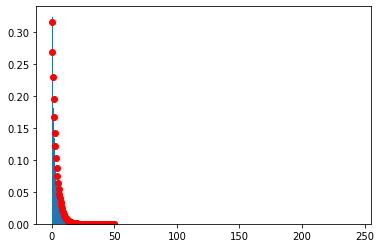

In [17]:
weights = np.ones_like(np.array(duration_of_gaze))/float(len(duration_of_gaze))
__ = plt.hist(duration_of_gaze, bins=300, weights=weights)
P = ss.expon.fit(duration_of_gaze) # P = [0.0, 3.165292439372325]
rX = np.linspace(0,50, 100)
rP = ss.expon.pdf(rX, *P)
#Yup, just unpack P with *P, instead of scale=XX and shape=XX, etc.
plt.plot(rX, rP, "ro")

# Building statistical model from headsup dataset

In [19]:
dataset_location = "/Users/evanpan/Documents/Datasets/Audio_turn_taking_dataset/"
dataset_location = "F:/MASC/JALI_neck/data/Audio_turn_taking_dataset/"
gaze_file_20q_name_template = "gaze/{}_20q_game_direct.xls"
gaze_file_heads_up_name_template = "gaze/{}_headsup_game_direct.xls"
talking_file_20q_name_template = "talking/{}_20q_game_talking.xls"
talking_file_heads_up_name_template = "talking/{}_headsup_game_talking.xls"

gaze_dfs = []
talking_dfs = []
# read the the 20q dataset
for i in range(1, 41):
    if i < 10:
        str_i = "0" + str(i)
    else:
        str_i = str(i)
    gaze_path_i = dataset_location + gaze_file_heads_up_name_template.format(str_i)
    talking_path_i = dataset_location + talking_file_heads_up_name_template.format(str_i)
    
    gaze_df = pd.read_excel(gaze_path_i)
    gaze_dfs.append(gaze_df)
    talking_df = pd.read_excel(talking_path_i)
    talking_dfs.append(talking_df)
# process them into a time series
gaze_series = []
talking_series = []
duration_of_gaze = []
for i in range(0, 20):
    df1 = gaze_dfs[2*i] 
    df2 = gaze_dfs[2*i+1]
    diff = df1["stop"][df1["stop"].shape[0]-1] - df1["start"][0]
    end = max(df1["stop"][df1["stop"].shape[0]-1], df2["stop"][df2["stop"].shape[0]-1])
    start = min(df1["start"][0], df2["start"][0])
    series = start - end
    for j in range(0, df1["start"].shape[0]):
        duration_of_gaze.append((df1["stop"][j] - df1["start"][j])/1000)
    for j in range(0, df2["start"].shape[0]):
        duration_of_gaze.append((df2["stop"][j] - df2["start"][j])/1000)
    

(0.0, 2.5441170323928946)


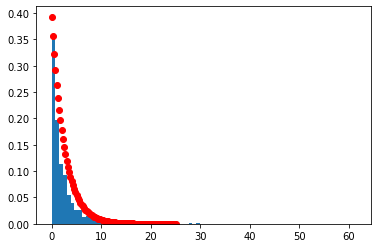

In [23]:
weights = np.ones_like(np.array(duration_of_gaze))/float(len(duration_of_gaze))
__ = plt.hist(duration_of_gaze, bins=80, weights=weights)
P = ss.expon.fit(duration_of_gaze) # P = (0.0, 2.5441170323928946)
print(P)
rX = np.linspace(0,25, 100)
rP = ss.expon.pdf(rX, *P)
#Yup, just unpack P with *P, instead of scale=XX and shape=XX, etc.
plt.plot(rX, rP, "ro")

### Get Probability on Gaze Aversion before speech turn 

In [52]:
dataset_location = "/Users/evanpan/Documents/Datasets/Audio_turn_taking_dataset/"
dataset_location = "F:/MASC/JALI_neck/data/Audio_turn_taking_dataset/"
gaze_file_20q_name_template = "gaze/{}_20q_game_direct.xls"
gaze_file_heads_up_name_template = "gaze/{}_headsup_game_direct.xls"
talking_file_20q_name_template = "talking/{}_20q_game_talking.xls"
talking_file_heads_up_name_template = "talking/{}_headsup_game_talking.xls"

gaze_dfs = []
talking_dfs = []
# read the the 20q dataset
for i in range(1, 41):
    if i < 10:
        str_i = "0" + str(i)
    else:
        str_i = str(i)
    gaze_path_i = dataset_location + gaze_file_20q_name_template.format(str_i)
    talking_path_i = dataset_location + talking_file_20q_name_template.format(str_i)
    
    gaze_df = pd.read_excel(gaze_path_i)
    gaze_dfs.append(gaze_df)
    talking_df = pd.read_excel(talking_path_i)
    talking_dfs.append(talking_df)
    
# determine how much turn-ending overlapps with direct gaze
threshold = 1
probs = []
for threshold in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15]:
    count_end_with_gaze = 0
    count_total = 0
    for i in range(0, 20):
        df_gaze_1 = gaze_dfs[2*i]
        df_gaze_2 = gaze_dfs[2*i+1]    
        df_talk_1 = talking_dfs[2*i] 
        df_talk_2 = talking_dfs[2*i+1]
        # compute it for speaker 1
        for j in range(0, df_talk_1["start"].shape[0]):
            df_talk_1_start = df_talk_1["start"][j]/1000
            df_talk_1_end = df_talk_1["stop"][j]/1000
            # iterate through the gaze list to see if any overlap with the gaze
            if df_talk_1_end - df_talk_1_start >= threshold:
                count_total = count_total + 1
                found = False
                for m in range(0, df_gaze_1["start"].shape[0]):
                    df_gaze_1_start = df_gaze_1["start"][m]/1000
                    df_gaze_1_end = df_gaze_1["stop"][m]/1000
                    if df_talk_1_end <= df_gaze_1_end and df_talk_1_end >= df_gaze_1_start:
                        found = True
                        break
                if found:
                    count_end_with_gaze = count_end_with_gaze + 1
        for j in range(0, df_talk_2["start"].shape[0]):
            df_talk_2_start = df_talk_2["start"][j]/1000
            df_talk_2_end = df_talk_2["stop"][j]/1000
            # iterate through the gaze list to see if any overlap with the gaze
            if df_talk_2_end - df_talk_2_start >= threshold:
                count_total = count_total + 1
                found = False
                for m in range(0, df_gaze_2["start"].shape[0]):
                    df_gaze_2_start = df_gaze_2["start"][m]/1000
                    df_gaze_2_end = df_gaze_2["stop"][m]/1000
                    if df_talk_2_end <= df_gaze_2_end and df_talk_2_end >= df_gaze_2_start:
                        found = True
                        break
                if found:
                    count_end_with_gaze = count_end_with_gaze + 1
    probs.append(count_end_with_gaze / count_total)

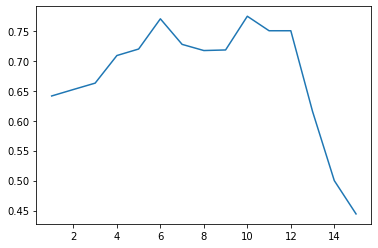

In [53]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], probs)

In [54]:
dataset_location = "/Users/evanpan/Documents/Datasets/Audio_turn_taking_dataset/"
dataset_location = "F:/MASC/JALI_neck/data/Audio_turn_taking_dataset/"
gaze_file_20q_name_template = "gaze/{}_20q_game_direct.xls"
gaze_file_heads_up_name_template = "gaze/{}_headsup_game_direct.xls"
talking_file_20q_name_template = "talking/{}_20q_game_talking.xls"
talking_file_heads_up_name_template = "talking/{}_headsup_game_talking.xls"

gaze_dfs = []
talking_dfs = []
# read the the 20q dataset
for i in range(1, 41):
    if i < 10:
        str_i = "0" + str(i)
    else:
        str_i = str(i)
    gaze_path_i = dataset_location + gaze_file_20q_name_template.format(str_i)
    talking_path_i = dataset_location + talking_file_20q_name_template.format(str_i)
    
    gaze_df = pd.read_excel(gaze_path_i)
    gaze_dfs.append(gaze_df)
    talking_df = pd.read_excel(talking_path_i)
    talking_dfs.append(talking_df)
    
# determine how much turn-ending overlapps with direct gaze
threshold = 1
delay_for_thresh = []
for threshold in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15]:
    delays = []
    for i in range(0, 20):
        df_gaze_1 = gaze_dfs[2*i]
        df_gaze_2 = gaze_dfs[2*i+1]    
        df_talk_1 = talking_dfs[2*i] 
        df_talk_2 = talking_dfs[2*i+1]
        # compute it for speaker 1
        for j in range(0, df_talk_1["start"].shape[0]):
            df_talk_1_start = df_talk_1["start"][j]/1000
            df_talk_1_end = df_talk_1["stop"][j]/1000
            # iterate through the gaze list to see if any overlap with the gaze
            if df_talk_1_end - df_talk_1_start >= threshold:
                min_distance = 1000
                min_delay = 0
                for m in range(0, df_gaze_1["start"].shape[0]):
                    df_gaze_1_start = df_gaze_1["start"][m]/1000
                    if abs(df_gaze_1_start - df_talk_1_end) < min_distance:
                        min_delay = df_gaze_1_start - df_talk_1_end
                        min_distance = abs(min_delay) 
                delays.append(min_delay)
        for j in range(0, df_talk_2["start"].shape[0]):
            df_talk_2_start = df_talk_2["start"][j]/1000
            df_talk_2_end = df_talk_2["stop"][j]/1000
            # iterate through the gaze list to see if any overlap with the gaze
            if df_talk_2_end - df_talk_2_start >= threshold:
                min_distance = 1000
                min_delay = 0
                for m in range(0, df_gaze_2["start"].shape[0]):
                    df_gaze_2_start = df_gaze_2["start"][m]/1000
                    if abs(df_gaze_2_start - df_talk_2_end) < min_distance:
                        min_delay = df_gaze_2_start - df_talk_2_end
                        min_distance = abs(min_delay) 
                delays.append(min_delay)
    delay_for_thresh.append(delays)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  2.,  6., 18., 68.,  7.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-279.36  , -275.5112, -271.6624, -267.8136, -263.9648, -260.116 ,
        -256.2672, -252.4184, -248.5696, -244.7208, -240.872 , -237.0232,
        -233.1744, -229.3256, -225.4768, -221.628 , -217.7792, -213.9304,
        -210.0816, -206.2328, -202.384 , -198.5352, -194.6864, -190.8376,
        -186.9888, -183.14  , -179.2912, -175.4424, -171.5936, -167.7448,
        -163.896 , -160.0472, -156.1984, -152.3496, -148.5008, -

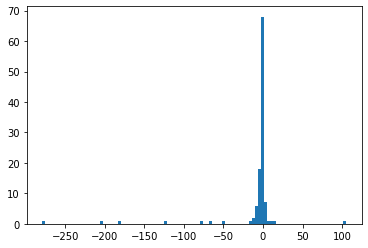

In [58]:
plt.hist(delay_for_thresh[5], bins=100)